In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
#Read in the data and convert date to datetime
data = pd.read_json("medium-next-generation-stats3.json")
data['collectedAt'] = pd.to_datetime(data['collectedAt'], unit='ms')

In [3]:
data.head()

,postId,collectedAt,flaggedSpam,upvotes,reads,views,claps,updateNotificationSubscribers,internalReferrerViews,friendsLinkViews,...,replyId,milestoneArg,quoteId,responsePostId,isUnread,catalogId,activityName,type,followers,earnings
0,49f43279c50f,2021-10-31 18:00:00,0.0,0.0,1.0,27.0,0.0,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49f43279c50f,2021-10-31 19:00:00,0.0,0.0,5.0,22.0,0.0,0.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49f43279c50f,2021-10-31 20:00:00,0.0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49f43279c50f,2021-10-31 21:00:00,0.0,1.0,2.0,15.0,1.0,0.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49f43279c50f,2021-10-31 22:00:00,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Choose the desired rows where views is not null.
#Drop other useless columns
#display only 5 random rows
#rename some columns
data.dropna(subset=['views']).dropna(axis=1).drop(['postId','flaggedSpam','updateNotificationSubscribers',
                                                          'friendsLinkViews','id'], 
                                                  axis=1).sample(5).rename(columns = {'collectedAt':'Hour collected',
                                                                                     'upvotes':'Fans','reads':'Reads',
                                                                                     'views':'Views', 'claps':'Claps'} )

,Hour collected,Fans,Reads,Views,Claps,internalReferrerViews,title
28434,2021-04-28 17:00:00,0.0,0.0,1.0,0.0,0.0,11 Essential Code Blocks for EDA (Exploratory ...
21688,2021-10-12 15:00:00,0.0,1.0,0.0,0.0,0.0,13 Key Code Blocks for EDA-Classification Task
43997,2022-01-04 05:00:00,0.0,1.0,7.0,0.0,0.0,"Successfully use If-Else Statements, For Loops..."
23378,2021-06-02 21:00:00,0.0,0.0,3.0,0.0,0.0,"Preventing Overfitting with Lasso, Ridge and E..."
38948,2021-06-04 21:00:00,0.0,0.0,2.0,0.0,0.0,"Successfully use If-Else Statements, For Loops..."


## Hourly activity data
#### feature engineering

In [5]:
#Choose the desired rows where views is not null and drop unwanted columns
titles = data.dropna(subset=['views']).dropna(axis=1).drop(['postId','flaggedSpam','updateNotificationSubscribers',
                                                          'friendsLinkViews','id'], axis=1)

#create new time related columns
titles['month'] = titles['collectedAt'].dt.month_name()
titles['year'] = titles['collectedAt'].dt.year
titles['month_year']  = titles['month'] + "_" + titles['year'].astype(str)
titles['weekday']  =titles['collectedAt'].dt.day_name()
titles['hour_of_day']  = titles['collectedAt'].dt.hour+1
titles['day_of_month']  = titles['collectedAt'].dt.day
titles['week_of_month']  = pd.to_numeric(titles['collectedAt'].dt.day/7).apply(lambda x: math.ceil(x))
titles.head()

,collectedAt,upvotes,reads,views,claps,internalReferrerViews,title,month,year,month_year,weekday,hour_of_day,day_of_month,week_of_month
0,2021-10-31 18:00:00,0.0,1.0,27.0,0.0,10.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,19,31,5
1,2021-10-31 19:00:00,0.0,5.0,22.0,0.0,6.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,20,31,5
2,2021-10-31 20:00:00,0.0,0.0,8.0,0.0,3.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,21,31,5
3,2021-10-31 21:00:00,1.0,2.0,15.0,1.0,6.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,22,31,5
4,2021-10-31 22:00:00,0.0,1.0,4.0,0.0,1.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,23,31,5


## Earnings data

In [6]:
#Choose desired rows by dropping all rows where earnings are null
earnings = data.dropna(subset=['earnings']).dropna(axis=1).drop('id', axis=1)

#Feature engineering
earnings['month'] = earnings['collectedAt'].dt.month_name()
earnings['year'] = earnings['collectedAt'].dt.year
earnings['month_year']  = earnings['month'] + "_" + earnings['year'].astype(str)
earnings['weekday']  =earnings['collectedAt'].dt.day_name()
earnings['hour_of_day']  = earnings['collectedAt'].dt.hour
earnings['day_of_month']  = earnings['collectedAt'].dt.day
earnings['week_of_month']  = pd.to_numeric(earnings['collectedAt'].dt.day/7).apply(lambda x: math.ceil(x))
earnings.head()

,collectedAt,title,earnings,month,year,month_year,weekday,hour_of_day,day_of_month,week_of_month
48581,2021-10-31 12:00:00,Filter a Pandas DataFrame by a Partial String ...,1.62,October,2021,October_2021,Sunday,12,31,5
48582,2021-11-01 12:00:00,Filter a Pandas DataFrame by a Partial String ...,10.30,November,2021,November_2021,Monday,12,1,1
48583,2021-11-02 12:00:00,Filter a Pandas DataFrame by a Partial String ...,4.82,November,2021,November_2021,Tuesday,12,2,1
48584,2021-11-03 12:00:00,Filter a Pandas DataFrame by a Partial String ...,3.52,November,2021,November_2021,Wednesday,12,3,1
48585,2021-11-04 12:00:00,Filter a Pandas DataFrame by a Partial String ...,6.09,November,2021,November_2021,Thursday,12,4,1


In [7]:
earnings.shape, titles.shape

((3553, 10), (48471, 14))

### Type of articles data
##### This dataframe contains information about each article such as the type and topic it talks about.
These details were entered manually on excel

In [8]:
gdf = pd.read_csv('unique_title_filled1.csv').iloc[:,1:]
gdf.head()

,title,Type,Listicle,Concept type,Topic,DS or other
0,"Ultimate Guide to Lists, Tuples, Arrays and Di...",What is it?,No,Specific,Data structures,DS
1,"Successfully use If-Else Statements, For Loops...",How-to tutorial,No,Specific,Control Flow,DS
2,4 Fundamental NumPy Properties Every Data Scie...,What is it?,Yes,Specific,Numpy,DS
3,What is Model Complexity? Compare Linear Regre...,What is it?,No,Specific,ML algorithms,ML
4,A 9 Step Proven Relationship Guide for Getting...,How-to tutorial,Yes,Other,Relationships,Other


#### Return only data science titles as a list
We only have 20 ds articles

In [9]:
ds_titles = gdf[gdf['DS or other'] != 'Other']['title'].unique().tolist()
len(ds_titles)

20

#### Filter the data to return only for 'data science' titles

In [10]:
earnings_ds = earnings[earnings['title'].isin(ds_titles)]
titles_ds = titles[titles['title'].isin(ds_titles)]

In [11]:
titles_ds.head(2)

,collectedAt,upvotes,reads,views,claps,internalReferrerViews,title,month,year,month_year,weekday,hour_of_day,day_of_month,week_of_month
0,2021-10-31 18:00:00,0.0,1.0,27.0,0.0,10.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,19,31,5
1,2021-10-31 19:00:00,0.0,5.0,22.0,0.0,6.0,Filter a Pandas DataFrame by a Partial String ...,October,2021,October_2021,Sunday,20,31,5


In [12]:
earnings_ds.head(2)

,collectedAt,title,earnings,month,year,month_year,weekday,hour_of_day,day_of_month,week_of_month
48581,2021-10-31 12:00:00,Filter a Pandas DataFrame by a Partial String ...,1.62,October,2021,October_2021,Sunday,12,31,5
48582,2021-11-01 12:00:00,Filter a Pandas DataFrame by a Partial String ...,10.30,November,2021,November_2021,Monday,12,1,1


### More feature engineering
##### read ratio

In [13]:
titles_ds['read_ratio'] = round(titles_ds['reads']/titles_ds['views']*100)

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### Type

In [14]:
#Add type to titles_ds
titles_ds['Type'] = ''
titles_ds.loc[titles_ds['title'] == '11 Essential Code Blocks for EDA (Exploratory Data Analysis) — Regression Task', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == '13 Key Code Blocks for EDA-Classification Task', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'Filter a Pandas DataFrame by a Partial String or Pattern in 8 Ways', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'How to Upload Large Image Datasets into Colab from Github, Kaggle and Local Machine', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'Pandas Melt, Stack and wide_to_long For Reshaping Columns into Rows', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'Preventing Overfitting with Lasso, Ridge and Elastic-net Regularization in Machine Learning', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'Successfully use If-Else Statements, For Loops and List Comprehensions in Python', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'The Ultimate 4 Step Guide to Clean Data', 
              'Type'] = 'How-to tutorial'
titles_ds.loc[titles_ds['title'] == 'What is Data Extraction? A Python Guide to Real-World Datasets', 
              'Type'] = 'How-to tutorial'

titles_ds.loc[titles_ds['title'] == '7 Data Pet Projects To Learn Data Science Faster', 
              'Type'] = 'Opinion'
titles_ds.loc[titles_ds['title'] == '8 Effective Strategies to Learn Data Science Faster in 2021', 
              'Type'] = 'Opinion'
titles_ds.loc[titles_ds['title'] == 'Data Answers the ‘Are You Too Old to Learn Coding?’ Timeless Question', 
              'Type'] = 'Opinion'

titles_ds.loc[titles_ds['title'] == '4 Fundamental NumPy Properties Every Data Scientist Must Master', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'A Pandas Tutorial Highlighting 8 Essential Functionalities', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'Demystify Deep Learning Terminologies and Build Your First Neural Network', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'Functions That Generate a Multi-index in Pandas and How to Remove the Levels', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'Fundamentals of Linear Regression for Machine Learning', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'Lambda Functions with Practical Examples in Python', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'Ultimate Guide to Lists, Tuples, Arrays and Dictionaries For Beginners.', 
              'Type'] = 'What is it?'
titles_ds.loc[titles_ds['title'] == 'What is Model Complexity? Compare Linear Regression to Decision Trees to Random Forests', 
              'Type'] = 'What is it?'

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Susan\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Grouped df
### Group by 'title name' and use 'sum' to aggregate
#### Pick only relevant columns, drop all time-related ones
This returns the overall performance of each title

In [15]:
grp_titles = titles_ds.groupby('title').sum().iloc[:, :5]

grp_earns = earnings_ds.groupby('title').sum().iloc[:, :1]

grp_df = pd.concat([grp_titles, grp_earns], axis=1)

grp_df.head()

,upvotes,reads,views,claps,internalReferrerViews,earnings
title,,,,,,
11 Essential Code Blocks for EDA (Exploratory Data Analysis) — Regression Task,273.0,4909.0,16421.0,606.0,7130.0,342.27
13 Key Code Blocks for EDA-Classification Task,27.0,859.0,2990.0,43.0,943.0,46.58
4 Fundamental NumPy Properties Every Data Scientist Must Master,52.0,4201.0,12101.0,65.0,2477.0,105.17
7 Data Pet Projects To Learn Data Science Faster,26.0,368.0,1407.0,93.0,779.0,16.83
8 Effective Strategies to Learn Data Science Faster in 2021,27.0,816.0,1820.0,108.0,797.0,16.35


### Feature engineering
##### age_in_months
for each title

In [16]:
#creating the date_published df using a dictionary, which is a more pythonic way
#create a dictionary with title as key and date published as value.
title_list = titles_ds['title'].unique()
title_date_dict = {}
for title in title_list:
    date = titles_ds[titles_ds['title'] == title]['collectedAt'].min()
    title_date_dict[title] = date

ages_df = pd.Series(title_date_dict).to_frame('date_published')
ages_df['age_in_months'] = (titles_ds['collectedAt'].max() - ages_df['date_published']).astype('timedelta64[M]').astype(int)

##### Length in minutes
These were manually entered using data from medium stats

In [17]:
title_len = [10,7,8,12,9,6,7,8,7,11,7,11,10,8,9,5,10,7,7,6]
ages_df['len_in_min'] = title_len

In [18]:
ages_df.head()

,date_published,age_in_months,len_in_min
Filter a Pandas DataFrame by a Partial String or Pattern in 8 Ways,2021-10-31 18:00:00,2,10
7 Data Pet Projects To Learn Data Science Faster,2021-10-13 12:00:00,2,7
Functions That Generate a Multi-index in Pandas and How to Remove the Levels,2021-09-17 13:00:00,3,8
A Pandas Tutorial Highlighting 8 Essential Functionalities,2021-07-23 04:00:00,5,12
"Pandas Melt, Stack and wide_to_long For Reshaping Columns into Rows",2021-07-17 17:00:00,5,9


##### month published

In [19]:
grp_df2 = pd.concat([grp_df, ages_df], axis=1)
grp_df2 = grp_df2.rename(columns = {'upvotes':'fans', 'internalReferrerViews':'internal_views'})
grp_df2['month_published'] = grp_df2['date_published'].dt.month_name() + "_" + grp_df2['date_published'].dt.year.astype(str)
grp_df2.head(2)

,fans,reads,views,claps,internal_views,earnings,date_published,age_in_months,len_in_min,month_published
11 Essential Code Blocks for EDA (Exploratory Data Analysis) — Regression Task,273.0,4909.0,16421.0,606.0,7130.0,342.27,2021-01-15 14:00:00,11,9,January_2021
13 Key Code Blocks for EDA-Classification Task,27.0,859.0,2990.0,43.0,943.0,46.58,2021-03-16 13:00:00,9,11,March_2021


##### Read ratio

In [20]:
grp_df2['read_ratio'] = round(grp_df2['reads']/grp_df2['views']*100)

#### merge this group_df and gdf (from excel)

In [21]:
gdf.head()

,title,Type,Listicle,Concept type,Topic,DS or other
0,"Ultimate Guide to Lists, Tuples, Arrays and Di...",What is it?,No,Specific,Data structures,DS
1,"Successfully use If-Else Statements, For Loops...",How-to tutorial,No,Specific,Control Flow,DS
2,4 Fundamental NumPy Properties Every Data Scie...,What is it?,Yes,Specific,Numpy,DS
3,What is Model Complexity? Compare Linear Regre...,What is it?,No,Specific,ML algorithms,ML
4,A 9 Step Proven Relationship Guide for Getting...,How-to tutorial,Yes,Other,Relationships,Other


In [22]:
full_gdf = pd.concat([grp_df2, gdf.set_index('title')], axis=1).dropna()
full_gdf.head(3)

,fans,reads,views,claps,internal_views,earnings,date_published,age_in_months,len_in_min,month_published,read_ratio,Type,Listicle,Concept type,Topic,DS or other
11 Essential Code Blocks for EDA (Exploratory Data Analysis) — Regression Task,273.0,4909.0,16421.0,606.0,7130.0,342.27,2021-01-15 14:00:00,11.0,9.0,January_2021,30.0,How-to tutorial,Yes,Specific,EDA,DS
13 Key Code Blocks for EDA-Classification Task,27.0,859.0,2990.0,43.0,943.0,46.58,2021-03-16 13:00:00,9.0,11.0,March_2021,29.0,How-to tutorial,Yes,Specific,EDA,DS
4 Fundamental NumPy Properties Every Data Scientist Must Master,52.0,4201.0,12101.0,65.0,2477.0,105.17,2020-12-16 20:00:00,12.0,7.0,December_2020,35.0,What is it?,Yes,Specific,Numpy,DS


# Analysis

In [23]:
fg = full_gdf[['earnings','views','reads','age_in_months','Type']].sort_values('earnings', ascending=False).head(10)
fg.rename(columns = {'earnings':'Earnings $', 'views':'No of Views','reads':'No of Reads', 'age_in_months':'Age in Months'})

,Earnings $,No of Views,No of Reads,Age in Months,Type
Lambda Functions with Practical Examples in Python,509.77,167885.0,23561.0,6.0,What is it?
11 Essential Code Blocks for EDA (Exploratory Data Analysis) — Regression Task,342.27,16421.0,4909.0,11.0,How-to tutorial
"Pandas Melt, Stack and wide_to_long For Reshaping Columns into Rows",119.93,10261.0,935.0,5.0,How-to tutorial
Filter a Pandas DataFrame by a Partial String or Pattern in 8 Ways,108.79,16925.0,1099.0,2.0,How-to tutorial
4 Fundamental NumPy Properties Every Data Scientist Must Master,105.17,12101.0,4201.0,12.0,What is it?
What is Model Complexity? Compare Linear Regression to Decision Trees to Random Forests,100.33,5614.0,1554.0,12.0,What is it?
"Successfully use If-Else Statements, For Loops and List Comprehensions in Python",70.03,44270.0,8663.0,12.0,How-to tutorial
13 Key Code Blocks for EDA-Classification Task,46.58,2990.0,859.0,9.0,How-to tutorial
A Pandas Tutorial Highlighting 8 Essential Functionalities,38.06,2940.0,452.0,5.0,What is it?
"How to Upload Large Image Datasets into Colab from Github, Kaggle and Local Machine",37.84,10947.0,1553.0,8.0,How-to tutorial


In [24]:
full_g = full_gdf.reset_index().rename(columns={'index':'title'})
full_g.head(1)

,title,fans,reads,views,claps,internal_views,earnings,date_published,age_in_months,len_in_min,month_published,read_ratio,Type,Listicle,Concept type,Topic,DS or other
0,11 Essential Code Blocks for EDA (Exploratory ...,273.0,4909.0,16421.0,606.0,7130.0,342.27,2021-01-15 14:00:00,11.0,9.0,January_2021,30.0,How-to tutorial,Yes,Specific,EDA,DS


### Number of titles per Type

In [25]:
type_counts = full_g.groupby('Type')['title'].count().to_frame('Titles').reset_index()
type_counts

,Type,Titles
0,How-to tutorial,9
1,Opinion,3
2,What is it?,8


### Count of active hours

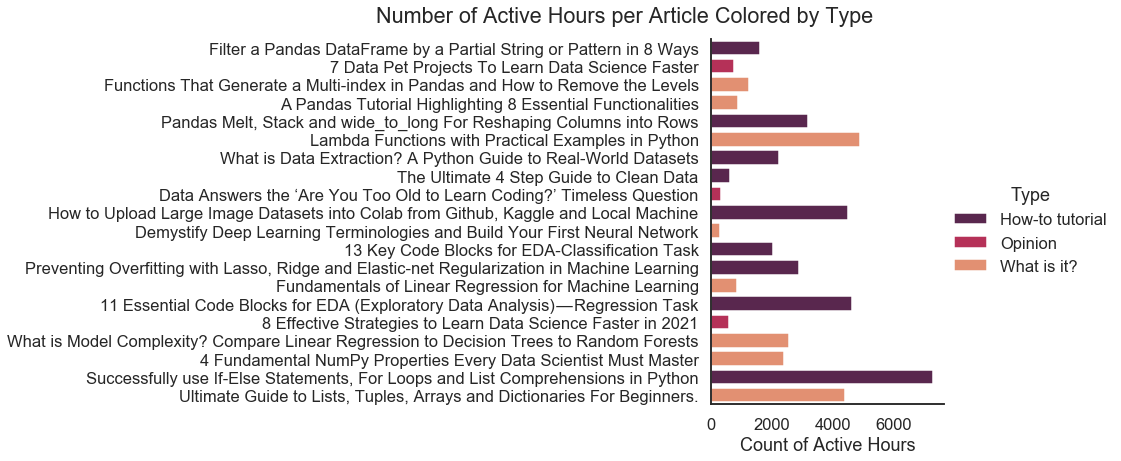

In [26]:
sns.set_context('talk')
sns.set_style('white')
g = sns.catplot(y='title', data=titles_ds, kind='count', hue='Type', 
                dodge=False, palette='rocket', height=6, aspect=2.5)
g.fig.suptitle('Number of Active Hours per Article Colored by Type', y=1.03,x=0.6)
g.set(xlabel='Count of Active Hours', ylabel='')
plt.show()

### Views

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


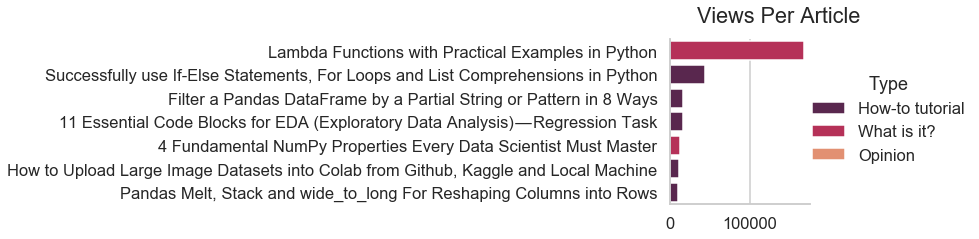

In [27]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.catplot(y='title', x= 'views',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('views', ascending=False).title[:7],
               height=3.3, hue='Type', dodge=False, estimator=sum)
g.fig.suptitle('Views Per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

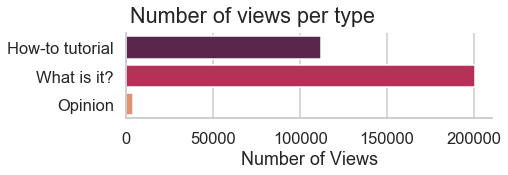

In [28]:
sns.set_context('talk')
sns.set_style('whitegrid')
g = sns.catplot(y='Type', x ='views' , data=full_g, kind='bar', palette='rocket', 
                ci=None, estimator=sum, height=2.1, aspect=3.5)
g.fig.suptitle('Number of views per type', y = 1.05)
plt.xticks()
g.set(xlabel='Number of Views', ylabel='')
plt.show()

### Reads

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


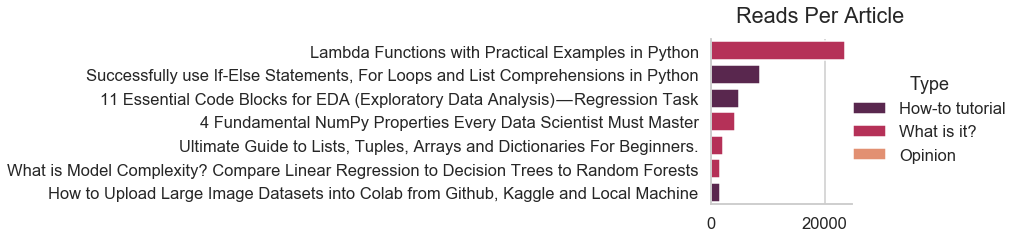

In [29]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.catplot(y='title', x= 'reads',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('reads', ascending=False).title[:7],
               height=3.3, hue='Type', dodge=False, estimator=sum)
g.fig.suptitle('Reads Per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

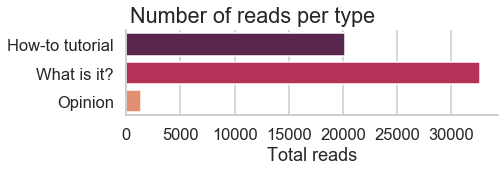

In [30]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.catplot(y='Type', x ='reads' , data=full_g, kind='bar', palette='rocket', ci=None, 
                estimator=sum, height=2.1, aspect=3.5)
g.fig.suptitle('Number of reads per type', y = 1.03)
plt.xticks()
g.set(xlabel='Total reads', ylabel='')
plt.show()

### Read ratio

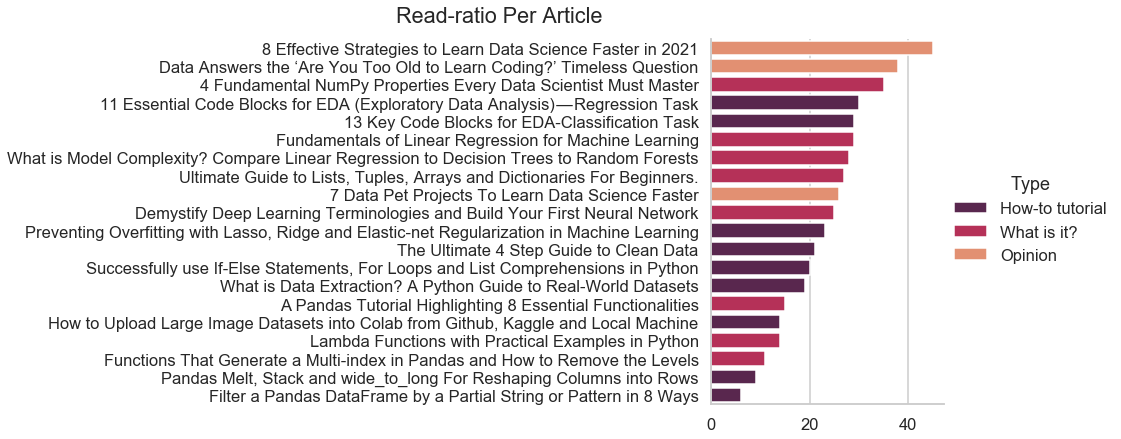

In [31]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.catplot(y='title', x= 'read_ratio',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('read_ratio', ascending=False).title,
                hue='Type', dodge=False, estimator=sum,  height=6, aspect=2.5)
g.fig.suptitle('Read-ratio Per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

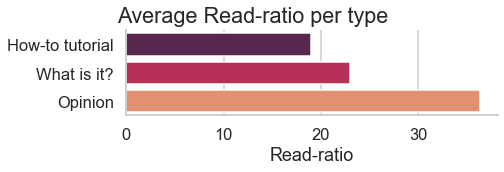

In [32]:
from numpy import median
sns.set_context('talk')
g = sns.catplot(y='Type', x ='read_ratio' , data=full_g, kind='bar', palette='rocket', ci=None, height=2.1, aspect=3.5)
g.fig.suptitle('Average Read-ratio per type', y = 1.03)
plt.xticks()
g.set(xlabel='Read-ratio', ylabel='')
plt.show()

### Fans

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


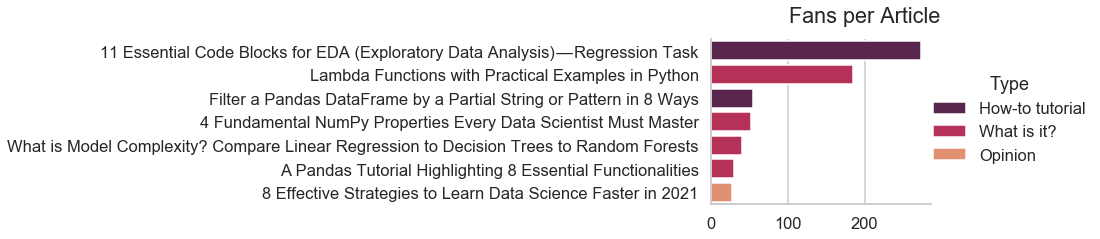

In [33]:
sns.set_context('talk')
g = sns.catplot(y='title', x= 'fans',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('fans', ascending=False).title[:7],
               #height=5.4, 
                hue='Type', dodge=False, estimator=sum, height=3.3, aspect=1.3)
g.fig.suptitle('Fans per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

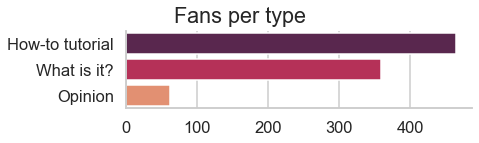

In [34]:
#sns.catplot(x='Type', y='fans', data=full_g, kind='bar', estimator=sum)
from numpy import median
sns.set_context('talk')
g = sns.catplot(y='Type', x ='fans' , data=full_g, kind='bar', palette='rocket', 
                estimator=sum,
                ci=None, height=2, aspect=3.5)
g.fig.suptitle('Fans per type', y = 1.03)
plt.xticks()
g.set(xlabel='', ylabel='')
plt.show()

### Claps

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


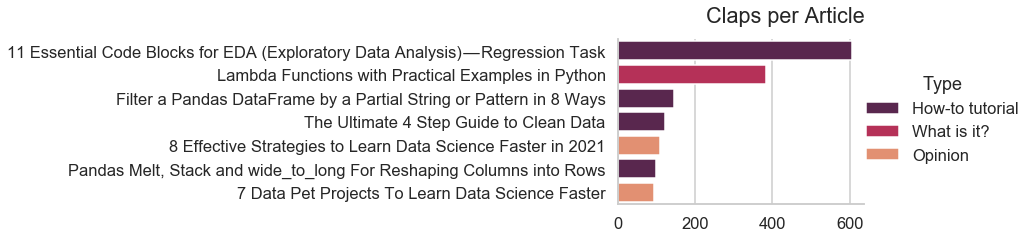

In [35]:
sns.set_context('talk')
g = sns.catplot(y='title', x= 'claps',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('claps', ascending=False).title[:7],
               #height=5.4, 
                hue='Type', dodge=False, estimator=sum, height=3.3, aspect=1.4)
g.fig.suptitle('Claps per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

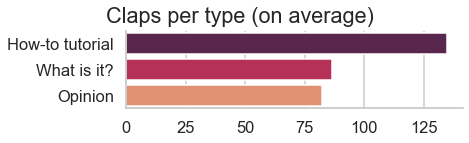

In [36]:
sns.set_context('talk')
g = sns.catplot(y='Type', x ='claps' , data=full_g, kind='bar', palette='rocket', 
                #estimator=sum,
                ci=None, height=2, aspect=3.5)
g.fig.suptitle('Claps per type (on average)', y = 1.03)
plt.xticks()
g.set(xlabel='', ylabel='')
plt.show()

In [37]:
full_g.groupby('Type')['claps'].mean()

Type
How-to tutorial    134.666667
Opinion             82.333333
What is it?         86.625000
Name: claps, dtype: float64

### Internal views

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


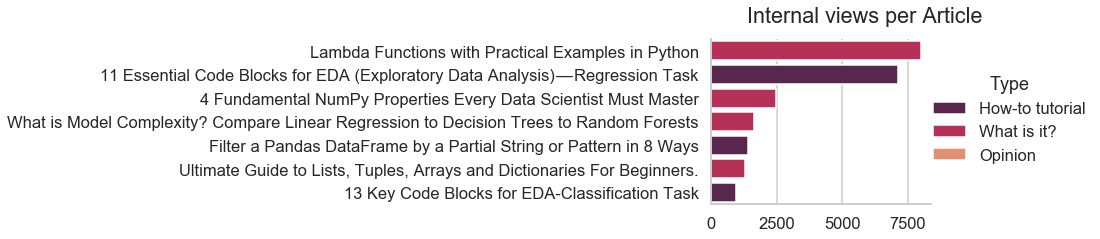

In [38]:
sns.set_context('talk')
g = sns.catplot(y='title', x= 'internal_views',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('internal_views', ascending=False).title[:7],
               #height=5.4, 
                hue='Type', dodge=False, estimator=sum, height=3.3, aspect=1.3)
g.fig.suptitle('Internal views per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

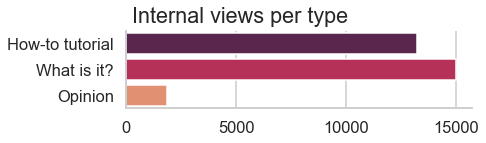

In [39]:
sns.set_context('talk')
g = sns.catplot(y='Type', x ='internal_views' , data=full_g, kind='bar', palette='rocket', 
                estimator=sum,
                ci=None, height=2, aspect=3.5)
g.fig.suptitle('Internal views per type', y = 1.03)
plt.xticks()
g.set(xlabel='', ylabel='')
plt.show()

### Earnings

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


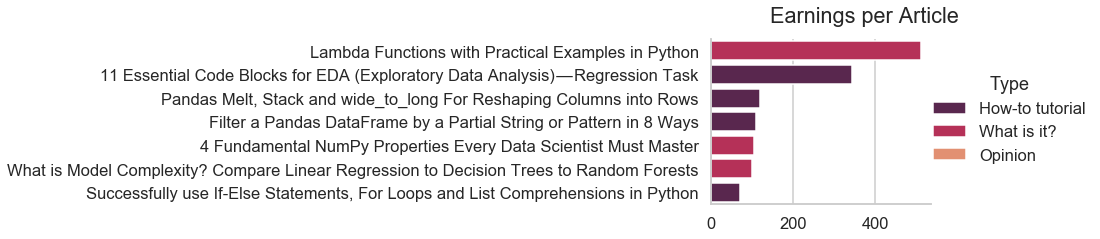

In [40]:
sns.set_context('talk')
g = sns.catplot(y='title', x= 'earnings',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('earnings', ascending=False).title[:7],
               #height=5.4, 
                hue='Type', dodge=False, estimator=sum, height=3.3, aspect=1.3)
g.fig.suptitle('Earnings per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

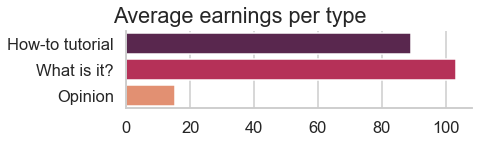

In [41]:
sns.set_context('talk')
g = sns.catplot(y='Type', x ='earnings' , data=full_g, kind='bar', palette='rocket', 
#                 estimator=sum,
                ci=None, height=2, aspect=3.5)
g.fig.suptitle('Average earnings per type', y = 1.03)
plt.xticks()
g.set(xlabel='', ylabel='')
plt.show()

##### Monthly earnings on average

In [42]:
full_g['ave_monthly_earnings'] = full_g['earnings']/full_g['age_in_months']

C:\Users\Susan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


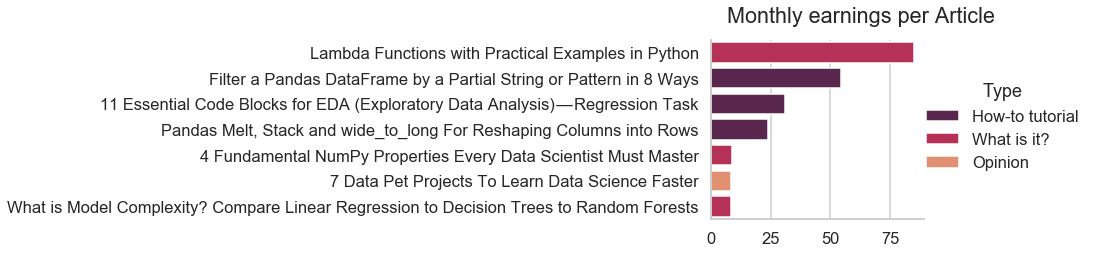

In [43]:
sns.set_context('talk')
g = sns.catplot(y='title', x= 'ave_monthly_earnings',data=full_g, kind='bar', palette='rocket',
               order=full_g.sort_values('ave_monthly_earnings', ascending=False).title[:7],
               #height=5.4, 
                hue='Type', dodge=False, estimator=sum, height=3.5, aspect=1.2)
g.fig.suptitle('Monthly earnings per Article', y = 1.03)
g.set(xlabel='', ylabel='')
plt.show()

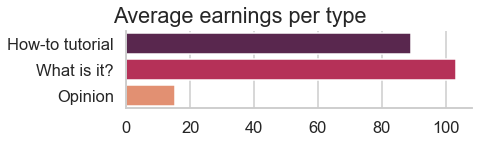

In [44]:
sns.set_context('talk')
g = sns.catplot(y='Type', x ='earnings' , data=full_g, kind='bar', palette='rocket', 
#                 estimator=sum,
                ci=None, height=2, aspect=3.5)
g.fig.suptitle('Average earnings per type', y = 1.03)
plt.xticks()
g.set(xlabel='', ylabel='')
plt.show()

### Read time (length in minutes)

In [45]:
full_g['len_in_min'].unique()

array([ 9., 11.,  7.,  5., 12., 10.,  8.,  6.])

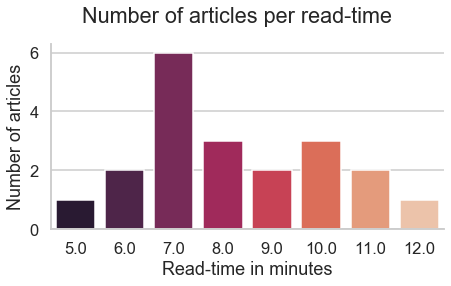

In [46]:
sns.set_context('talk')
g = sns.catplot(x='len_in_min', data=full_g, palette='rocket', 
                kind='count', height=3.5, aspect=1.8)#,height=4, aspect=1.5)
g.fig.suptitle('Number of articles per read-time', y = 1.07)
g.set(xlabel='Read-time in minutes', ylabel='Number of articles')
plt.show()

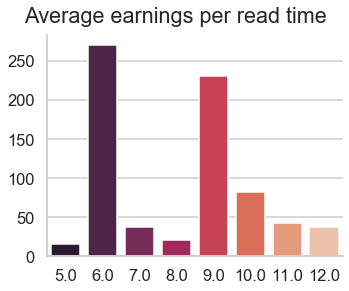

In [47]:
sns.set_context('talk')
g = sns.catplot(y='earnings', x ='len_in_min' , data=full_g, kind='bar', palette='rocket', 
#                 estimator=sum,
                ci=None, height=4, aspect=1.3)
g.fig.suptitle('Average earnings per read time', y = 1.03)
plt.xticks()
g.set(xlabel='', ylabel='')
plt.show()

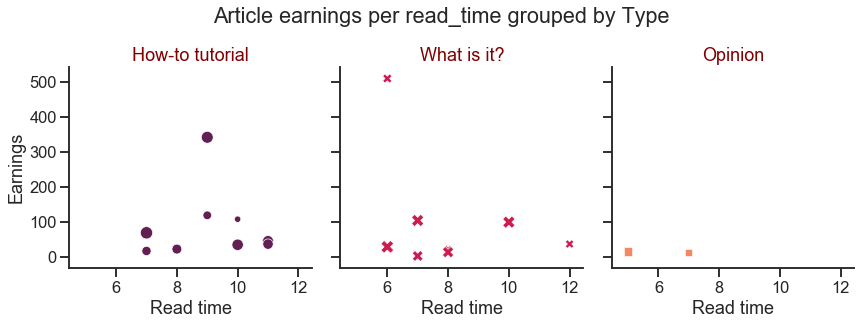

In [48]:
sns.set_style('ticks')
sns.set_context('talk')
g = sns.relplot(x='len_in_min', y='earnings', data=full_g, kind='scatter', col='Type', hue='Type', 
            palette='rocket', style ='Type', size= 'age_in_months', legend=False, height=4)
           # hue='Type', palette='rocket', height=5, aspect=1.7, style='Type')
g.fig.suptitle('Article earnings per read_time grouped by Type', y=1.07)
g.set_titles('{col_name}', color='maroon')
g.set(xlabel = 'Read time', ylabel='Earnings')
plt.show()

### Hour of day

In [49]:
#Hourly activity ranked. The most active hour is 15:00
titles_ds.groupby('hour_of_day')['views'].sum().sort_values(ascending=False)

hour_of_day
15    17504.0
14    17479.0
16    16792.0
13    16625.0
17    15622.0
12    15515.0
11    15171.0
10    15022.0
18    14943.0
9     14605.0
8     14526.0
7     14063.0
19    13933.0
20    13002.0
6     12474.0
21    12079.0
5     11686.0
22    10525.0
4     10432.0
3      9790.0
23     9185.0
2      8664.0
24     8461.0
1      8290.0
Name: views, dtype: float64

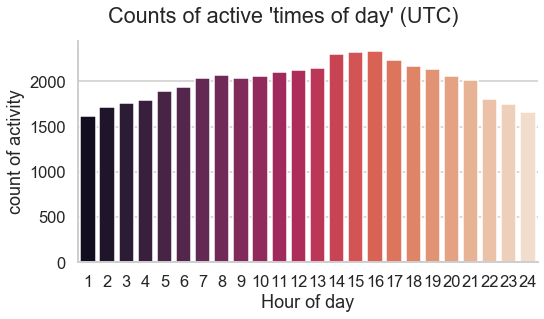

In [50]:
#sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.set_style('whitegrid')
g = sns.catplot(x='hour_of_day', data=titles_ds, palette='rocket', 
                kind='count', height=4, aspect=1.9)
g.fig.suptitle("Counts of active 'times of day' (UTC)", y = 1.05)
g.set(xlabel='Hour of day', ylabel='count of activity')
plt.show()

### Day of week

In [51]:
#order the weekdays
titles_ds['weekday'] = pd.Categorical(titles_ds['weekday'], 
               categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              ordered=True)

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


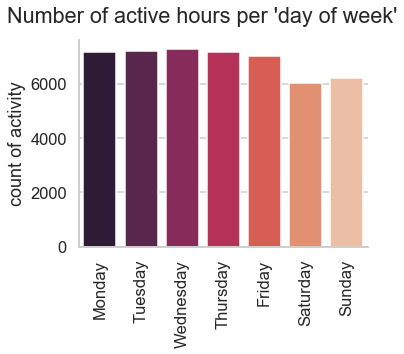

In [52]:
sns.set_style('whitegrid')
g = sns.catplot(x='weekday', data=titles_ds, palette='rocket', 
                kind='count', height=3.8, aspect=1.4)
g.fig.suptitle("Number of active hours per 'day of week'", y = 1.05)
plt.xticks(rotation=90)
g.set(xlabel='', ylabel='count of activity')
plt.show()

### Day of month

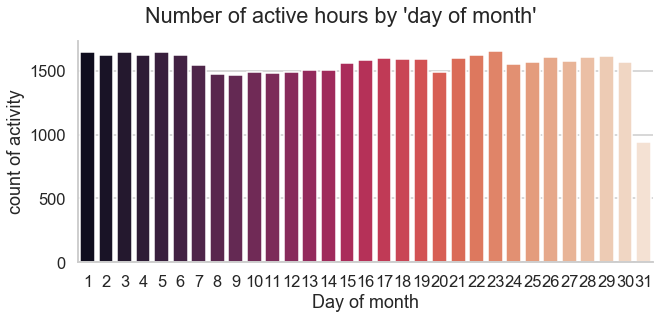

In [53]:
sns.set_style('whitegrid')
g = sns.catplot(x='day_of_month', data=titles_ds, palette='rocket', 
                kind='count', height=4, aspect=2.3)
g.fig.suptitle("Number of active hours by 'day of month'", y = 1.05)
g.set(xlabel='Day of month', ylabel='count of activity')
plt.show()

In [54]:
full_g.head(1)

,title,fans,reads,views,claps,internal_views,earnings,date_published,age_in_months,len_in_min,month_published,read_ratio,Type,Listicle,Concept type,Topic,DS or other,ave_monthly_earnings
0,11 Essential Code Blocks for EDA (Exploratory ...,273.0,4909.0,16421.0,606.0,7130.0,342.27,2021-01-15 14:00:00,11.0,9.0,January_2021,30.0,How-to tutorial,Yes,Specific,EDA,DS,31.115455


In [55]:
full_g['hour_published']  = full_g['date_published'].dt.hour
full_g['weekday_published']  =full_g['date_published'].dt.day_name()

## Top 5 performers

In [56]:
top_list = ['Lambda Functions with Practical Examples in Python',
 '11 Essential Code Blocks for EDA (Exploratory Data Analysis)\u200a—\u200aRegression Task',
 'Filter a Pandas DataFrame by a Partial String or Pattern in 8 Ways',
 '4 Fundamental NumPy Properties Every Data Scientist Must Master',
 'Successfully use If-Else Statements, For Loops and List Comprehensions in Python']

In [57]:
#Filter df to return only the 5 top performers
top_df = full_g[full_g['title'].isin(top_list)].sort_values('earnings', ascending=False, ignore_index=True)

##### hour and weekday published

In [58]:
full_g['hour_published']  = full_g['date_published'].dt.hour
full_g['weekday_published']  =full_g['date_published'].dt.day_name()

In [59]:
top_df2 = top_df.loc[:, ['title','len_in_min','Type','Listicle','age_in_months',
               'weekday_published','hour_published', 'earnings','ave_monthly_earnings',
              'read_ratio', 'reads','views','internal_views', 'fans','claps']]
top_df2['internal_views_percent'] = top_df2['internal_views']/top_df2['views']*100
top_df2.head(1)

,title,len_in_min,Type,Listicle,age_in_months,weekday_published,hour_published,earnings,ave_monthly_earnings,read_ratio,reads,views,internal_views,fans,claps,internal_views_percent
0,Lambda Functions with Practical Examples in Py...,6.0,What is it?,No,6.0,Thursday,13,509.77,84.961667,14.0,23561.0,167885.0,7983.0,185.0,382.0,4.755041


In [60]:
#Rename columns for display
top_df3 = top_df2.rename(columns={'len_in_min':'length in minutes', 'age_in_months':'age in months',
                       'read_ratio':'read ratio', 'internal_views':'internal views',
                       'ave_monthly_earnings':'average monthly earnings',
                       'internal_views_percent':'percentage of internal views'})

In [61]:
top_df3

,title,length in minutes,Type,Listicle,age in months,weekday_published,hour_published,earnings,average monthly earnings,read ratio,reads,views,internal views,fans,claps,percentage of internal views
0,Lambda Functions with Practical Examples in Py...,6.0,What is it?,No,6.0,Thursday,13,509.77,84.961667,14.0,23561.0,167885.0,7983.0,185.0,382.0,4.755041
1,11 Essential Code Blocks for EDA (Exploratory ...,9.0,How-to tutorial,Yes,11.0,Friday,14,342.27,31.115455,30.0,4909.0,16421.0,7130.0,273.0,606.0,43.420011
2,Filter a Pandas DataFrame by a Partial String ...,10.0,How-to tutorial,Yes,2.0,Sunday,18,108.79,54.395000,6.0,1099.0,16925.0,1394.0,54.0,146.0,8.236337
3,4 Fundamental NumPy Properties Every Data Scie...,7.0,What is it?,Yes,12.0,Wednesday,20,105.17,8.764167,35.0,4201.0,12101.0,2477.0,52.0,65.0,20.469383
4,"Successfully use If-Else Statements, For Loops...",7.0,How-to tutorial,No,12.0,Thursday,12,70.03,5.835833,20.0,8663.0,44270.0,718.0,14.0,24.0,1.621866


### Correlation heatmap

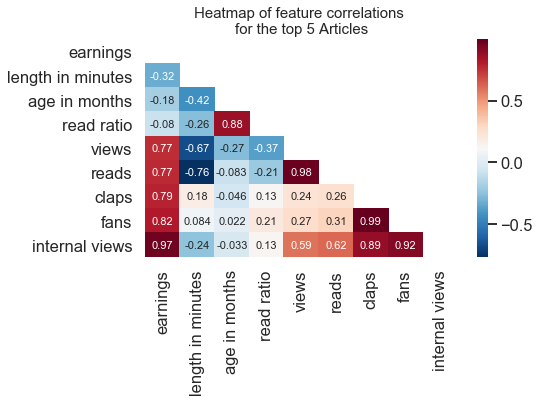

In [62]:
top_corr = top_df3[[ 'earnings','length in minutes','age in months','read ratio',
                    'views','reads','claps','fans','internal views']].corr()
mask = np.zeros_like(top_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 4))
    ax = sns.heatmap(top_corr, mask=mask, cmap='RdBu_r', annot=True, annot_kws={"size": 11})
    plt.title('Heatmap of feature correlations \nfor the top 5 Articles', fontsize=15,y=1.05)

### Correlation of Earnings vs everything else diverging barplot

In [63]:
def get_correlations_df(df, column):
    '''
    INPUT:
    df - A python dataframe containing the columns we need for correlations 
    column - The column for which we need to get its correlation coefficients with other features
    
    OUTPUT:
    corrs_df - a dataframe with 2 columns; features and coefficients
    '''
    corrs = df.corr()                        # All coefficients
    column_corrs = corrs[column]             # coeffs for just 1 column
    sorted_corrs = column_corrs.sort_values()# sorted from least
    frame = {'Feature': sorted_corrs.index, 'Correlation': sorted_corrs.values} #A dictionary of feature and their correlations
    corrs_df = pd.DataFrame(frame)           #create a dataframe from this dictionary
    corrs_df = corrs_df[corrs_df['Feature'] != column] #remove the correlation with itself, which is always 1
    return corrs_df

age_active_corrs = get_correlations_df(top_df3, 'earnings')

#Remove correlations that are not important the task
age_active_corrs = age_active_corrs[
    (age_active_corrs['Feature'] != 'average monthly earnings') & 
    (age_active_corrs['Feature'] != 'percentage of internal views') &
    (age_active_corrs['Feature'] != 'hour_of_day')]
#Reset index again before the above rows left missing row indices
age_active_corrs = age_active_corrs.reset_index(drop=True)

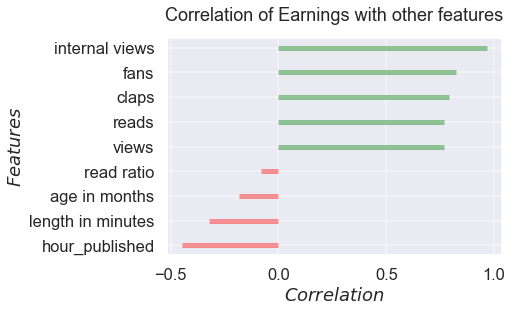

In [64]:
sns.set_style('darkgrid')
sns.set_context('talk')
def plot_diverging_barplots(df, title):
    '''
    INPUT:
    df - A python dataframe with the features and their correlations
    title - The title for the plot containing diverging barplots
    
    OUTPUT:
    Displays the plot
    '''
    sns.set_context('talk')
    # Prepare Data
    x = df.loc[:, ['Feature']]
    df['colors'] = ['red' if x < 0 else 'green' for x in df['Correlation']]

    # Draw plot
#     plt.figure(figsize=(10,8), dpi= 80)
    plt.hlines(y=df['Feature'], xmin=0, xmax=df['Correlation'], color=df.colors, alpha=0.4, linewidth=5)

    # Decorations
    plt.gca().set(ylabel='$Features$', xlabel='$Correlation$')
    plt.yticks(df.index, df['Feature'])#, fontsize=12)
    plt.title(title, y=1.05)#, fontdict={'size':20})
    plt.grid(linestyle='-', alpha=0.5)
    plt.show()
    
plot_diverging_barplots(age_active_corrs, 'Correlation of Earnings with other features')

In [65]:
#style formatting so that the dataframe tables have borders
# %%HTML
# <style type="text/css">
# table.dataframe td, table.dataframe th {
#     border: 1px  black solid !important;
#   color: black !important;
# }
# </style>